#### This is an exact copy of visual_pollution.py script

In [1]:
import sys
sys.path.append("..")
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from utils import data_extractor, plot_history
from helper import  pollution_model_transfer


PROJECT_NAME = "visual_pollution"
DATA_PATH = os.path.join(f"../datasets/{PROJECT_NAME}")
BATCH_SIZE = 32
IMG_SHAPE = (224,224,3)

# Extract and load the data
data_extractor(PROJECT_NAME)

train_metadata = pd.read_csv(os.path.join(DATA_PATH, "train.csv"))
test_metadata = pd.read_csv(os.path.join(DATA_PATH, "train.csv"))
class_names = dict(zip(train_metadata["class"].astype(int), train_metadata["name"]))

2023-05-13 10:05:46.547750: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-13 10:05:48.515987: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib/cuda/include:/usr/lib/cuda/lib64::/usr/local/cuda/extras/CUPTI/lib64
2023-05-13 10:05:48.516239: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib/cuda/include:/usr/lib/cuda/lib64::/usr/loca

In [2]:
# Load images as numpy arrays
if not os.path.exists(os.path.join(DATA_PATH, "train_dataset")):
    train_metadata = train_metadata.assign(
        image = lambda x: x["image_path"]
            .map(lambda img_path: 
                cv2.resize(
                        cv2.imread(os.path.join(DATA_PATH, "images/images", img_path)),
                        (IMG_SHAPE[0], IMG_SHAPE[1]))
                )
    )
    train_ds = tf.data.Dataset.from_tensor_slices(
        (np.array(train_metadata["image"].tolist()).astype(np.float32), train_metadata["class"].astype(int)))
    train_ds.save(os.path.join(DATA_PATH, "train_dataset"))
    
    test_metadata = test_metadata.assign(
        image = lambda x: x["image_path"]
            .map(lambda img_path: 
                cv2.resize(
                        cv2.imread(os.path.join(DATA_PATH, "images/images", img_path)),
                        (IMG_SHAPE[0], IMG_SHAPE[1]))
                )
    )
    test_ds = tf.data.Dataset.from_tensor_slices(
        (np.array(test_metadata["image"].tolist()).astype(np.float32), test_metadata["class"].astype(int)))
    test_ds.save(os.path.join(DATA_PATH, "test_dataset"))
else:
    train_ds = tf.data.Dataset.load(os.path.join(DATA_PATH, "train_dataset"))
    test_ds = tf.data.Dataset.load(os.path.join(DATA_PATH, "test_dataset"))

2023-05-13 10:05:51.117191: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-13 10:05:51.175904: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-13 10:05:51.176195: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-13 10:05:51.177327: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorF

In [3]:
# Create a testset
num_of_batches = tf.data.experimental.cardinality(test_ds).numpy()
valid_ds = test_ds.take(int(0.8 * num_of_batches))
test_ds = test_ds.skip(int(0.8 * num_of_batches))

train_ds = train_ds.shuffle(50000).batch(BATCH_SIZE).cache().prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
valid_ds = valid_ds.shuffle(50000).batch(BATCH_SIZE).cache().prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
test_ds = test_ds.batch(BATCH_SIZE)
train_ds = train_ds.map(lambda img, label: (tf.cast(img, tf.float32), label))
valid_ds = valid_ds.map(lambda img, label: (tf.cast(img, tf.float32), label))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Epoch 1/15


2023-05-13 10:06:49.453961: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8101
2023-05-13 10:06:50.495464: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-05-13 10:06:52.006863: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x55f449de35a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-05-13 10:06:52.006895: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 2060 SUPER, Compute Capability 7.5
2023-05-13 10:06:52.041972: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-05-13 10:06:52.274844: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-05-13 10:06:52.318528: I tensorflow/compiler/jit/xla_com

624/624 [==============================] - 67s 81ms/step - loss: 1.5255 - sparse_categorical_accuracy: 0.5410 - val_loss: 0.9873 - val_sparse_categorical_accuracy: 0.6586
Epoch 2/15
624/624 [==============================] - 44s 70ms/step - loss: 1.0158 - sparse_categorical_accuracy: 0.6526 - val_loss: 0.8244 - val_sparse_categorical_accuracy: 0.7149
Epoch 3/15
624/624 [==============================] - 42s 68ms/step - loss: 0.8681 - sparse_categorical_accuracy: 0.7009 - val_loss: 0.7301 - val_sparse_categorical_accuracy: 0.7539
Epoch 4/15
624/624 [==============================] - 41s 66ms/step - loss: 0.7489 - sparse_categorical_accuracy: 0.7408 - val_loss: 0.7785 - val_sparse_categorical_accuracy: 0.7502
Epoch 5/15
624/624 [==============================] - 45s 72ms/step - loss: 0.6543 - sparse_categorical_accuracy: 0.7729 - val_loss: 0.7710 - val_sparse_categorical_accuracy: 0.7603
Epoch 6/15
624/624 [==============================] - 45s 72ms/step - loss: 0.5868 - sparse_categoric

<Figure size 1400x1000 with 0 Axes>

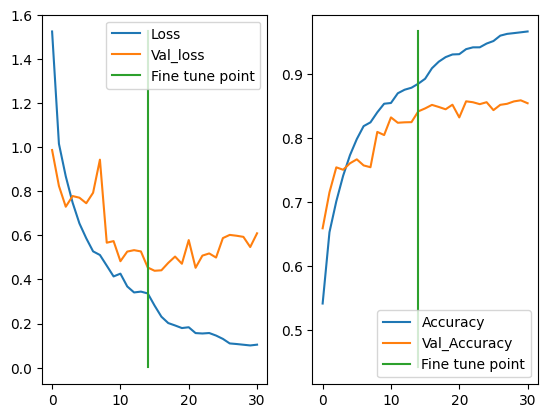

In [4]:
# %% Transfer learning on mobilenet_v2
model = pollution_model_transfer(IMG_SHAPE)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=tf.keras.metrics.SparseCategoricalAccuracy())

history = model.fit(train_ds, epochs=15, validation_data=valid_ds)
# Fine tune 
for l in model.layers[3].layers[int(0.7*len(model.layers[3].layers)):]:
    l.trainable=True

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=tf.keras.metrics.SparseCategoricalAccuracy())

history2 = model.fit(train_ds, 
                      epochs=30,
                      validation_data=valid_ds, 
                      initial_epoch=history.epoch[-1])
# %%Plots
plot_history(
    (history.history["loss"] + history2.history["loss"],
        history.history["val_loss"] + history2.history["val_loss"],
        history.history["sparse_categorical_accuracy"] + history2.history["sparse_categorical_accuracy"],
        history.history["val_sparse_categorical_accuracy"] + history2.history["val_sparse_categorical_accuracy"]),
    history.epoch[-1]
)

Epoch 1/15
624/624 [==============================] - 71s 103ms/step - loss: 1.6103 - accuracy: 0.5184 - val_loss: 1.1729 - val_accuracy: 0.5736
Epoch 2/15
624/624 [==============================] - 64s 103ms/step - loss: 1.1551 - accuracy: 0.6046 - val_loss: 1.1022 - val_accuracy: 0.6076
Epoch 3/15
624/624 [==============================] - 66s 105ms/step - loss: 1.0589 - accuracy: 0.6305 - val_loss: 1.0993 - val_accuracy: 0.5963
Epoch 4/15
624/624 [==============================] - 67s 107ms/step - loss: 0.9876 - accuracy: 0.6571 - val_loss: 1.0291 - val_accuracy: 0.6117
Epoch 5/15
624/624 [==============================] - 66s 106ms/step - loss: 0.9410 - accuracy: 0.6696 - val_loss: 1.0235 - val_accuracy: 0.6157
Epoch 6/15
624/624 [==============================] - 65s 105ms/step - loss: 0.8892 - accuracy: 0.6880 - val_loss: 0.9564 - val_accuracy: 0.6436
Epoch 7/15
624/624 [==============================] - 66s 105ms/step - loss: 0.8379 - accuracy: 0.7071 - val_loss: 0.9765 - val_ac

<Figure size 1400x1000 with 0 Axes>

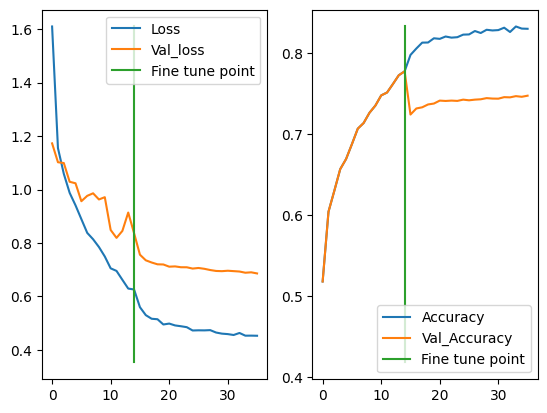

In [5]:
# %% Trying with data augmentation to see if it improves model performance
model2 = pollution_model_transfer(IMG_SHAPE)

model_augm = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal", seed=47),
    tf.keras.layers.RandomRotation(0.1, seed=47),
    model2
])

model_augm.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=["accuracy"])

history = model_augm.fit(train_ds, 
                         epochs=15, 
                         validation_data=valid_ds)
# Fine tune 
for l in model_augm.layers[2].layers[3].layers[int(0.7*len(model_augm.layers[2].layers[3].layers)):]:
    l.trainable=True

model_augm.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=["accuracy"])

history2 = model_augm.fit(train_ds, 
                          epochs=35,
                          validation_data=valid_ds, 
                          initial_epoch=history.epoch[-1])
# Plots
plot_history(
    (history.history["loss"] + history2.history["loss"],
        history.history["val_loss"] + history2.history["val_loss"],
        history.history["accuracy"] + history2.history["accuracy"],
        history.history["accuracy"] + history2.history["val_accuracy"]),
    history.epoch[-1]
)

1/1 [==============================] - 1s 1s/step


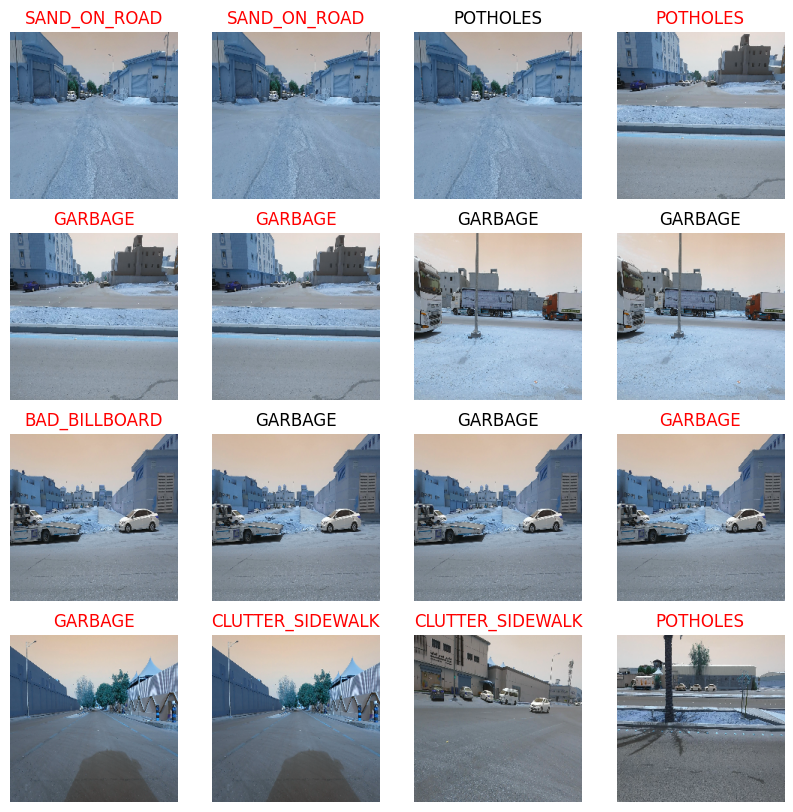

In [21]:
# %% Show some predictions on test set
test_unit = test_ds.shuffle(50000).take(1)
preds = np.argmax(tf.nn.softmax(model.predict(test_unit)), axis=1)
for img, labels in test_unit:
    plt.figure(figsize=(10,10))
    for i in range(16):
        plt.subplot(4, 4, i+1)
        if labels[i] == preds[i]:
            color = "black"
        else:
            color = "red"
        plt.imshow(img[i].numpy().astype("uint8"))
        plt.title(f"{class_names[preds[i]]}", color=color)
        plt.axis("off")